# Challenge: Preparing a dataset for modeling

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
%matplotlib inline
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
happy_data = pd.read_csv('2017WorldHappiness.csv')

In [3]:
happy_data.head()

,Country,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,GovernmentTrust,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


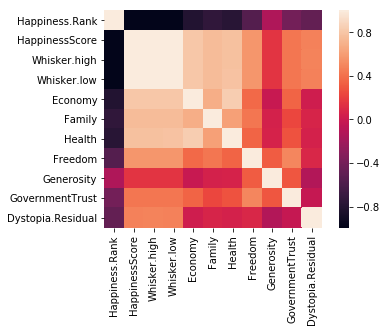

In [4]:
sns.heatmap(happy_data.corr(), square = True);

In [5]:
happy_data.corr()

,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,GovernmentTrust,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
HappinessScore,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
GovernmentTrust,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


In [6]:
new_data = happy_data.copy()

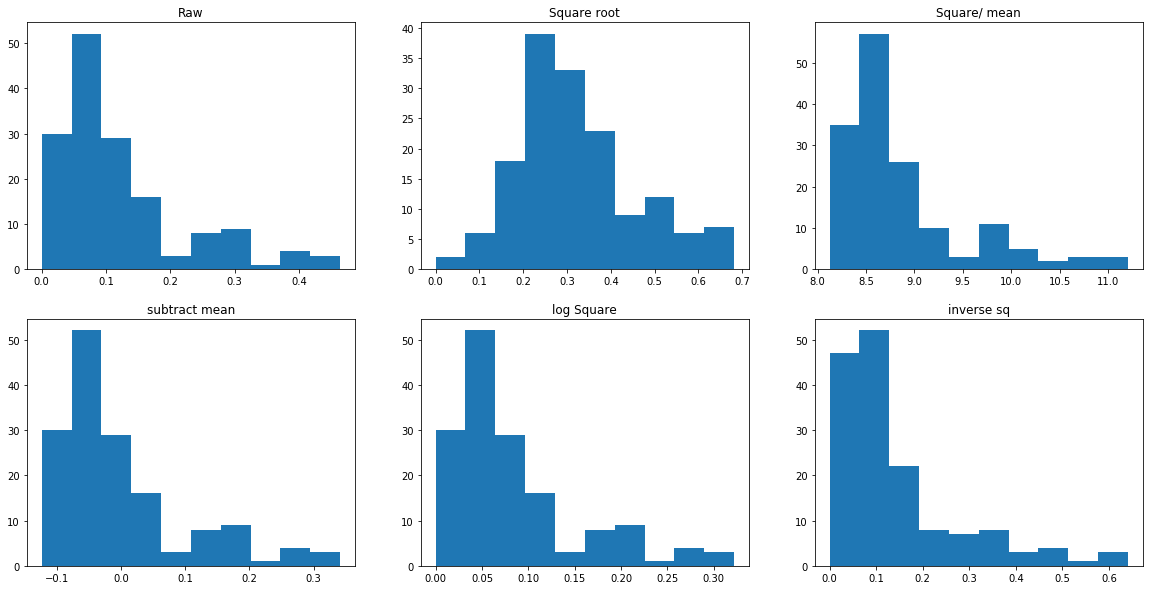

In [7]:
# I ran into an issue where the log and inverse would give me a valueerror range parameter must be finite, I squared the number before using these to fix the issue
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(231)
plt.hist(happy_data['GovernmentTrust'])
plt.title('Raw')

fig.add_subplot(232)
plt.hist(np.sqrt(happy_data['GovernmentTrust']))
plt.title('Square root')

fig.add_subplot(233)
plt.hist(2**(happy_data['GovernmentTrust'])/np.mean(happy_data['GovernmentTrust']))
plt.title('Square/ mean')

fig.add_subplot(234)
plt.hist((happy_data['GovernmentTrust'])-np.mean(happy_data['GovernmentTrust']))
plt.title('subtract mean')

fig.add_subplot(235)
sqgov = 2** happy_data.GovernmentTrust
plt.hist(np.log(sqgov))
plt.title('log Square')

fig.add_subplot(236)
plt.hist(sqgov/(1/happy_data.GovernmentTrust))
plt.title('inverse sq')

plt.show()

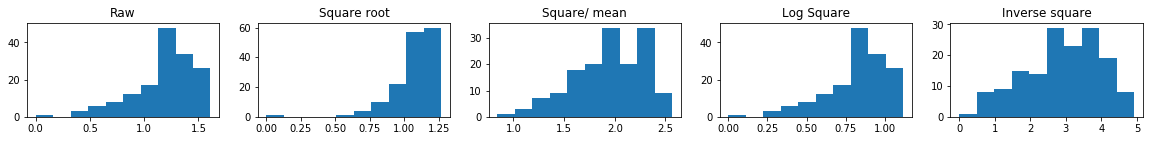

In [8]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(551)
plt.hist(happy_data['Family'])
plt.title('Raw')

fig.add_subplot(552)
plt.hist(np.sqrt(happy_data['Family']))
plt.title('Square root')

fig.add_subplot(553)
plt.hist(2**(happy_data['Family'])/np.mean(happy_data['Family']))
plt.title('Square/ mean')

fig.add_subplot(554)
sqfam = 2** happy_data.Family
plt.hist(np.log(sqfam))
plt.title('Log Square')

fig.add_subplot(555)
plt.hist(sqfam/(1/happy_data.Family))
plt.title('Inverse square')

plt.show()

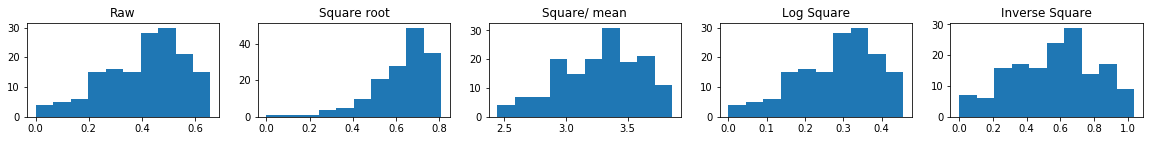

In [9]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(551)
plt.hist(happy_data['Freedom'])
plt.title('Raw')

fig.add_subplot(552)
plt.hist(np.sqrt(happy_data['Freedom']))
plt.title('Square root')

fig.add_subplot(553)
plt.hist(2**(happy_data['Freedom'])/np.mean(happy_data['Freedom']))
plt.title('Square/ mean')

fig.add_subplot(554)
sqfree = 2** happy_data.Freedom
plt.hist(np.log(sqfree))
plt.title('Log Square')

fig.add_subplot(555)
plt.hist(sqfree/(1/happy_data.Freedom))
plt.title('Inverse Square')

plt.show()

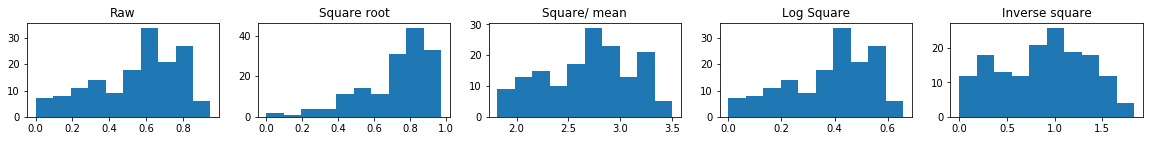

In [10]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(551)
plt.hist(happy_data['Health'])
plt.title('Raw')

fig.add_subplot(552)
plt.hist(np.sqrt(happy_data['Health']))
plt.title('Square root')

fig.add_subplot(553)
plt.hist(2**(happy_data['Health'])/np.mean(happy_data['Health']))
plt.title('Square/ mean')

fig.add_subplot(554)
sqHealth = 2** happy_data.Health
plt.hist(np.log(sqHealth))
plt.title('Log Square')

fig.add_subplot(555)
plt.hist(sqHealth/(1/happy_data.Health))
plt.title('Inverse square')

plt.show()

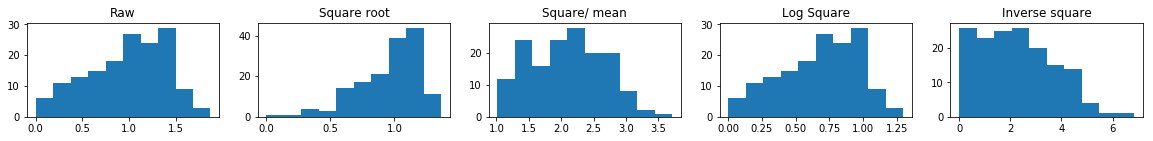

In [11]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(551)
plt.hist(happy_data['Economy'])
plt.title('Raw')

fig.add_subplot(552)
plt.hist(np.sqrt(happy_data['Economy']))
plt.title('Square root')

fig.add_subplot(553)
plt.hist(2**(happy_data['Economy'])/np.mean(happy_data['Economy']))
plt.title('Square/ mean')

fig.add_subplot(554)
sqEconomy = 2** happy_data.Economy
plt.hist(np.log(sqEconomy))
plt.title('Log Square')

fig.add_subplot(555)
plt.hist(sqEconomy/(1/happy_data.Economy))
plt.title('Inverse square')

plt.show()

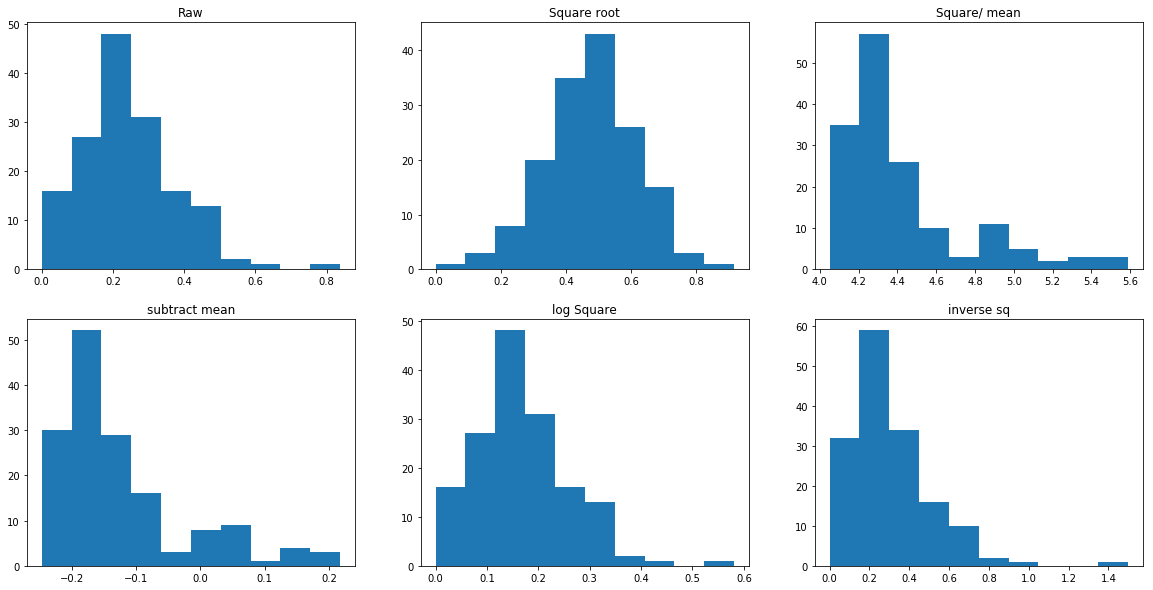

In [12]:
fig = plt.figure(figsize = (20, 10))

fig.add_subplot(231)
plt.hist(happy_data['Generosity'])
plt.title('Raw')

fig.add_subplot(232)
plt.hist(np.sqrt(happy_data['Generosity']))
plt.title('Square root')

fig.add_subplot(233)
plt.hist(2**(happy_data['GovernmentTrust'])/np.mean(happy_data['Generosity']))
plt.title('Square/ mean')

fig.add_subplot(234)
plt.hist((happy_data['GovernmentTrust'])-np.mean(happy_data['Generosity']))
plt.title('subtract mean')

fig.add_subplot(235)
sqgov = 2** happy_data.Generosity
plt.hist(np.log(sqgov))
plt.title('log Square')

fig.add_subplot(236)
plt.hist(sqgov/(1/happy_data.Generosity))
plt.title('inverse sq')

plt.show()

In [13]:
new_data['GovernmentTrust'] = (np.sqrt(happy_data['GovernmentTrust']))
new_data['Family'] = (sqfam/(1/happy_data.Family))
new_data['Freedom'] = (sqfree/(1/happy_data.Freedom))
new_data['Health'] = (2**(happy_data['Health'])/np.mean(happy_data['Health']))
new_data['Economy'] = (np.log(sqEconomy))
new_data['Generosity'] =(np.sqrt(happy_data['Generosity']))

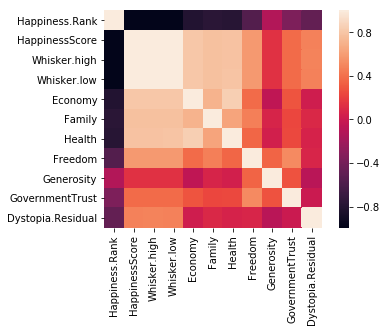

In [14]:
sns.heatmap(new_data.corr(), square = True);

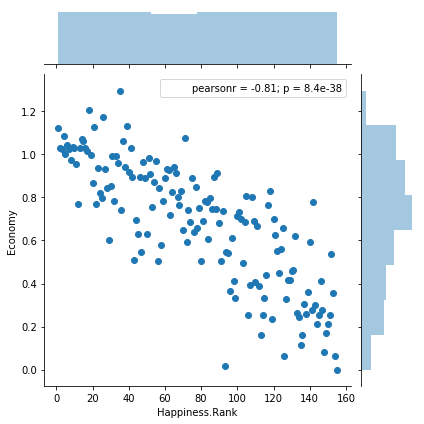

In [15]:
sns.jointplot(new_data['Happiness.Rank'], new_data['Economy'])

plt.show()

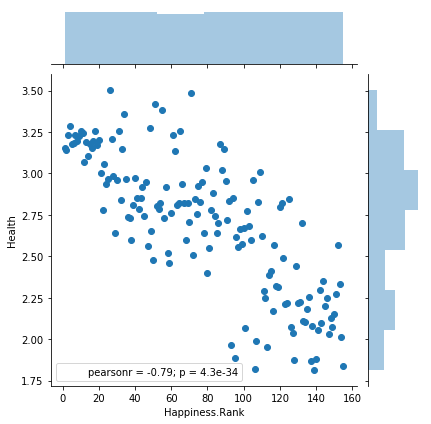

In [16]:
sns.jointplot(new_data['Happiness.Rank'], new_data['Health']);


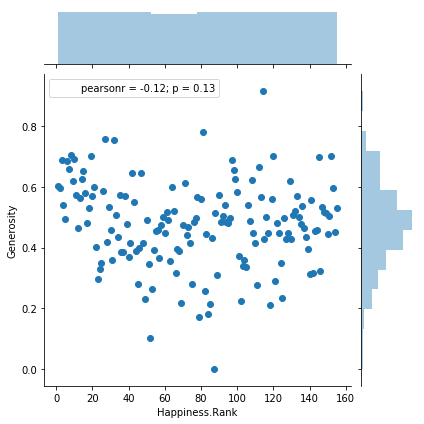

In [17]:
# Generosity is showing a low correlation between the happy country rankings and the p-value is > .05 this would be the first feature I would remove
sns.jointplot(new_data['Happiness.Rank'], new_data['Generosity']);

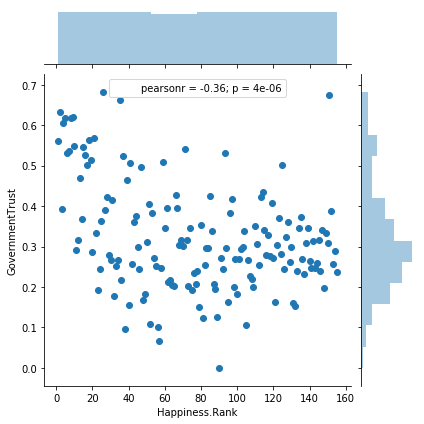

In [18]:
sns.jointplot(new_data['Happiness.Rank'], new_data['GovernmentTrust']);

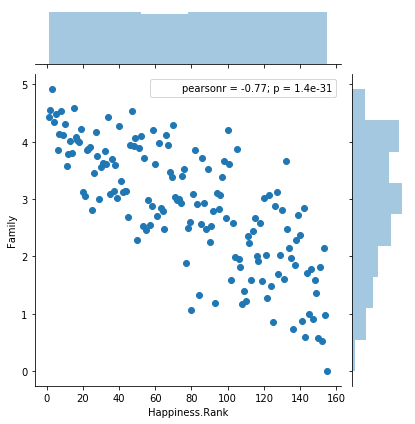

In [19]:
sns.jointplot(new_data['Happiness.Rank'], new_data['Family']);

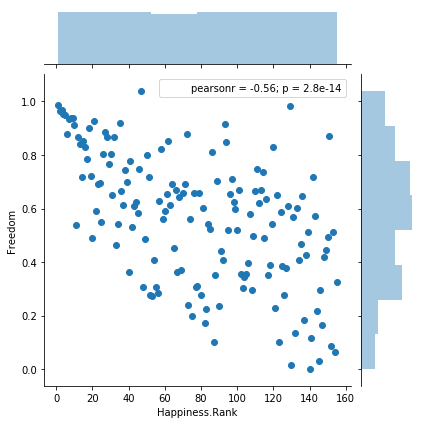

In [20]:
sns.jointplot(new_data['Happiness.Rank'], new_data['Freedom']);